In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [6]:
def read_csv(file):
    return pd.read_csv(file, names=['Resolution', 'CHM', 'CHD', 'IFN', 'IRN', 'OPN', 'SMQ', 'SCOH', 'SCOP', 'CMQ', 'CCOH', 'CCOP'])
df = read_csv('514840279__danyuan-application_19_07_21_28_44_K15.csv')


In [7]:
# Normalize data
df_norm = df.copy()

def normalize(df):
    df_min = df.min()
    df_max = df.max()
    df = df.apply(lambda x : (x - df_min)/(df_max - df_min))
    return df

def normalize_data(df):
    df['IFN'] = normalize(df['IFN'])
    df['IRN'] = normalize(df['IRN'])
    df['SMQ'] = normalize(df['SMQ'])
    df['CMQ'] = normalize(df['CMQ'])

    return df

    
df_norm = normalize_data(df_norm)


In [8]:
# Adjust values of IFN, IRN, SCOP and CCOP to 1-x, (lower values mean better results) 
def adjust_values(df):
    df['IFN'] = df['IFN'].apply(lambda x: 1-x)
    df['IRN'] = df['IRN'].apply(lambda x: 1-x)
    df['SCOP'] = df['SCOP'].apply(lambda x: 1-x)
    df['CCOP'] = df['CCOP'].apply(lambda x: 1-x)
    return df
df_norm = adjust_values(df_norm)
df_norm

,Resolution,CHM,CHD,IFN,IRN,OPN,SMQ,SCOH,SCOP,CMQ,CCOH,CCOP
0,0.3,0.592256,0.541210,1.000000,0.373702,137.0,1.000000,0.311864,0.994165,0.916117,0.708374,0.999487
1,0.3,0.594556,0.531715,1.000000,0.000000,136.0,0.938162,0.303290,0.992957,0.912457,0.707532,0.999469
2,0.3,0.589079,0.507587,0.946479,0.072664,136.0,0.970472,0.307545,0.993812,0.928450,0.711346,0.999413
3,0.4,0.548666,0.422402,0.876369,0.474048,131.0,0.740628,0.271147,0.993852,1.000000,0.728781,0.998790
4,0.4,0.548666,0.422402,0.901408,0.442907,131.0,0.797648,0.280265,0.993754,0.978081,0.723786,0.998635
5,0.4,0.538651,0.452495,0.876369,0.058824,134.0,0.701846,0.265602,0.993262,0.816864,0.685717,0.998822
6,0.5,0.486993,0.390780,0.758003,0.169550,128.0,0.659160,0.258711,0.993401,0.714951,0.662272,0.998320
7,0.5,0.506287,0.401255,0.856338,0.249135,130.0,0.730596,0.270742,0.992671,0.856543,0.695340,0.998523
8,0.5,0.512873,0.389568,0.816901,0.342561,128.0,0.744491,0.272860,0.992750,0.914301,0.709091,0.998343
9,0.6,0.466286,0.309883,0.628614,0.847751,123.0,0.750891,0.271075,0.995548,0.843112,0.693155,0.997551


In [9]:
def calculate_total(df):
    df['Total'] = (df.loc[:,'IFN':'IRN'].sum(axis=1) + df.loc[:,'SMQ'] + df.loc[:,'CMQ'])
    #df['Total'] = (0.1 * df.loc[:,'CHM']) + (0.1 * df.loc[:,'CHD']) + (0.2 * df.loc[:,'IFN']) + (0.2 * df.loc[:,'IRN']) + (0.2 * df.loc[:,'SMQ']) + (0.2 * df.loc[:,'CMQ'])
    #df['Total'] = df.loc[:,'SCOH'] + df.loc[:,'SCOP'] + df.loc[:,'CCOH'] + df.loc[:,'CCOP']
    return df

df_norm = calculate_total(df_norm)
df_norm


,Resolution,CHM,CHD,IFN,IRN,OPN,SMQ,SCOH,SCOP,CMQ,CCOH,CCOP,Total
0,0.3,0.592256,0.541210,1.000000,0.373702,137.0,1.000000,0.311864,0.994165,0.916117,0.708374,0.999487,3.289819
1,0.3,0.594556,0.531715,1.000000,0.000000,136.0,0.938162,0.303290,0.992957,0.912457,0.707532,0.999469,2.850619
2,0.3,0.589079,0.507587,0.946479,0.072664,136.0,0.970472,0.307545,0.993812,0.928450,0.711346,0.999413,2.918065
3,0.4,0.548666,0.422402,0.876369,0.474048,131.0,0.740628,0.271147,0.993852,1.000000,0.728781,0.998790,3.091046
4,0.4,0.548666,0.422402,0.901408,0.442907,131.0,0.797648,0.280265,0.993754,0.978081,0.723786,0.998635,3.120044
5,0.4,0.538651,0.452495,0.876369,0.058824,134.0,0.701846,0.265602,0.993262,0.816864,0.685717,0.998822,2.453903
6,0.5,0.486993,0.390780,0.758003,0.169550,128.0,0.659160,0.258711,0.993401,0.714951,0.662272,0.998320,2.301664
7,0.5,0.506287,0.401255,0.856338,0.249135,130.0,0.730596,0.270742,0.992671,0.856543,0.695340,0.998523,2.692612
8,0.5,0.512873,0.389568,0.816901,0.342561,128.0,0.744491,0.272860,0.992750,0.914301,0.709091,0.998343,2.818254
9,0.6,0.466286,0.309883,0.628614,0.847751,123.0,0.750891,0.271075,0.995548,0.843112,0.693155,0.997551,3.070367


In [10]:
def choose_best_iteration_for_resolution(df_norm):
    best = {}
    drop_indexes = []
    for index, row in df_norm.iterrows():
        res = row['Resolution']
        total = row['Total']

        if res in best:
            if total >= best[res][1]:
                drop_indexes.append(best[res][0])
                best[res] = (index, total)
            else:
                drop_indexes.append(index)
        else:
            best[res] = (index, total)


    df_norm = df_norm.drop(df_norm.index[drop_indexes]).reset_index(drop=True)
    return df_norm

df_norm = choose_best_iteration_for_resolution(df_norm)
df_norm
            
        
        

,Resolution,CHM,CHD,IFN,IRN,OPN,SMQ,SCOH,SCOP,CMQ,CCOH,CCOP,Total
0,0.3,0.592256,0.541210,1.000000,0.373702,137.0,1.000000,0.311864,0.994165,0.916117,0.708374,0.999487,3.289819
1,0.4,0.548666,0.422402,0.901408,0.442907,131.0,0.797648,0.280265,0.993754,0.978081,0.723786,0.998635,3.120044
2,0.5,0.512873,0.389568,0.816901,0.342561,128.0,0.744491,0.272860,0.992750,0.914301,0.709091,0.998343,2.818254
3,0.6,0.466286,0.309883,0.628614,0.847751,123.0,0.750891,0.271075,0.995548,0.843112,0.693155,0.997551,3.070367
4,0.7,0.455166,0.361967,0.600939,0.975779,121.0,0.650455,0.255157,0.995578,0.691681,0.658236,0.996888,2.918853
5,0.8,0.448619,0.319362,0.530240,0.757785,121.0,0.463989,0.225886,0.995353,0.592353,0.634689,0.997095,2.344368
6,0.9,0.386128,0.303058,0.405634,0.899654,120.0,0.514839,0.234547,0.994735,0.449746,0.601886,0.996389,2.269873
7,1.0,0.368039,0.308007,0.138678,0.757785,119.0,0.317918,0.204797,0.993335,0.277790,0.562636,0.995233,1.492172


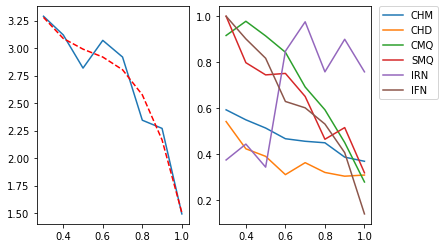

In [11]:
def plot(df_norm):
    x = df_norm['Resolution']
    y = df_norm['Total']
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    
    ax1.plot(x,y)
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    ax1.plot(x,p(x),'r--')
    
    
    ax2.plot(x, df_norm['CHM'], label='CHM')
    ax2.plot(x, df_norm['CHD'], label='CHD')
    ax2.plot(x, df_norm['CMQ'], label='CMQ')
    ax2.plot(x, df_norm['SMQ'], label='SMQ')
    ax2.plot(x, df_norm['IRN'], label='IRN')
    ax2.plot(x, df_norm['IFN'], label='IFN')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

plot(df_norm)




Metrics for uq-eresearch__lorestore
KeyError on uq-eresearch__lorestore



Metrics for khasang__delivery
KeyError on khasang__delivery



Metrics for ZFGCCP__ZFGC3
KeyError on ZFGCCP__ZFGC3



Metrics for XMFBee__AuthPlatform1
KeyError on XMFBee__AuthPlatform1



Metrics for bbaibb1009__wxcrm
KeyError on bbaibb1009__wxcrm



Metrics for nds1993__OpenMPS
KeyError on nds1993__OpenMPS



Metrics for flamefire33__uckefu
KeyError on flamefire33__uckefu



Metrics for KongZouXiang__TradeSteward
KeyError on KongZouXiang__TradeSteward



Metrics for parasoft__parabank
KeyError on parasoft__parabank



Metrics for scrumtracker__scrumtracker2017
KeyError on scrumtracker__scrumtracker2017



Metrics for holagoldfish__H5APP-java
KeyError on holagoldfish__H5APP-java



Metrics for softservedata__lv257
KeyError on softservedata__lv257



Metrics for surajcm__Poseidon
KeyError on surajcm__Poseidon



Metrics for gvSIGAssociation__gvsig-web
KeyError on gvSIGAssociation__gvsig-web



Metrics for qia

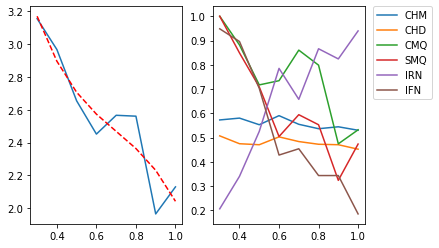




Metrics for loongw513029__buscloud
KeyError on loongw513029__buscloud



Metrics for WilsonHu__sinsim
KeyError on WilsonHu__sinsim



Metrics for tcrct__duang
KeyError on tcrct__duang



Metrics for easy-ware__api-manager
KeyError on easy-ware__api-manager



Metrics for justinscript__shopping.plat
KeyError on justinscript__shopping.plat



Metrics for jlu-linshuhang__goods-master
KeyError on jlu-linshuhang__goods-master



Metrics for simbest__simbest-cores
KeyError on simbest__simbest-cores



Metrics for wh4585hai__OnlineSchool
KeyError on wh4585hai__OnlineSchool



Metrics for SafeExamBrowser__seb-server
KeyError on SafeExamBrowser__seb-server



Metrics for kai8406__cmop
KeyError on kai8406__cmop



Metrics for shuxianfeng__movision
KeyError on shuxianfeng__movision



Metrics for zxwgdft__paladin-boot
KeyError on zxwgdft__paladin-boot



Metrics for tom1994__CEM
KeyError on tom1994__CEM



Metrics for skyisbule__nanfeng
KeyError on skyisbule__nanfeng



Metrics for moocss__Eas

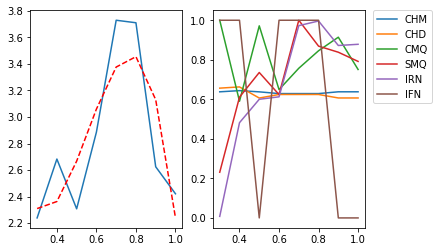




Metrics for ushahidi__SwiftRiver-API
KeyError on ushahidi__SwiftRiver-API



Metrics for nieyue__ActivationCodeMall
KeyError on nieyue__ActivationCodeMall



Metrics for miansen__Roothub
KeyError on miansen__Roothub



Metrics for chenzhq__WsMonitor
KeyError on chenzhq__WsMonitor



Metrics for yaowuya__lprapm
KeyError on yaowuya__lprapm



Metrics for kdirector1990__WeRPNetwork
KeyError on kdirector1990__WeRPNetwork



Metrics for MiniPa__cjs_ssms
KeyError on MiniPa__cjs_ssms



Metrics for OpenGeoportal__OGP2
KeyError on OpenGeoportal__OGP2



Metrics for kinorsi__mykided-api
KeyError on kinorsi__mykided-api



Metrics for qiemengyan__videoconfigserver
KeyError on qiemengyan__videoconfigserver



Metrics for forwardNow__javaee_pkui
KeyError on forwardNow__javaee_pkui



Metrics for mingslife__LightCMS
KeyError on mingslife__LightCMS



Metrics for joubin__CSC191
KeyError on joubin__CSC191



Metrics for SupermePower__zammc-manage
KeyError on SupermePower__zammc-manage



Metrics f

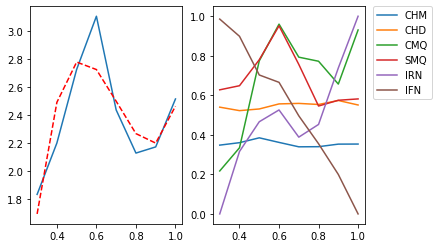




Metrics for sunxingtm__FPMS
KeyError on sunxingtm__FPMS



Metrics for okfarm09__JYLAND
KeyError on okfarm09__JYLAND



Metrics for GZzzhsmart__P2Pproj
KeyError on GZzzhsmart__P2Pproj



Metrics for ElectiveTeam__elective_system
KeyError on ElectiveTeam__elective_system



Metrics for moxiaohei__OPMS
KeyError on moxiaohei__OPMS



Metrics for crypto-coder__open-cyclos
KeyError on crypto-coder__open-cyclos



Metrics for zhangdaiscott__jeecg-nomaven
KeyError on zhangdaiscott__jeecg-nomaven



Metrics for immime__shop-2
KeyError on immime__shop-2



Metrics for shenshaoming__byte_easy
KeyError on shenshaoming__byte_easy



Metrics for cym1102__nginxWebUI
KeyError on cym1102__nginxWebUI



Metrics for fishstormX__fishmaple
KeyError on fishstormX__fishmaple



Metrics for lancelee98__PeopleMange
KeyError on lancelee98__PeopleMange



Metrics for YouAreOnlyOne__CommunityInformationForWeb
KeyError on YouAreOnlyOne__CommunityInformationForWeb



Metrics for CeaMYHBK__AppCeaM
KeyError on Ce

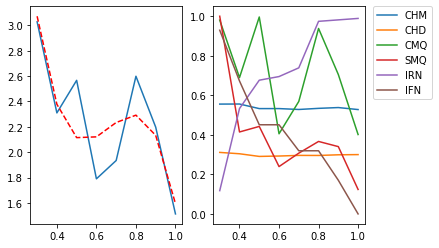




Metrics for tlkzzz__xpjfx
KeyError on tlkzzz__xpjfx



Metrics for leluque__university-site-cms
KeyError on leluque__university-site-cms



Metrics for linolee__class4
KeyError on linolee__class4



Metrics for AaronSum__hotel-mgr-sys
KeyError on AaronSum__hotel-mgr-sys



Metrics for jdmr__mateo
KeyError on jdmr__mateo



Metrics for AURIN__online-whatif
KeyError on AURIN__online-whatif



Metrics for longyzkd__wj-web-ext-enhancer
KeyError on longyzkd__wj-web-ext-enhancer



Metrics for 768330962__poet_ready_system
KeyError on 768330962__poet_ready_system



Metrics for EUSurvey__EUSURVEY
Total classes: 294
Total controllers: 46
Open issues : 7
Stars : 8
Commits: 505
Max val resolution: 0.4


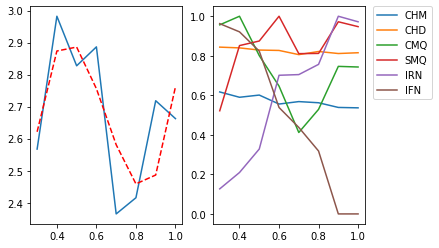




Metrics for wang007__live-server
KeyError on wang007__live-server



Metrics for orgqy88cckz__AccumulationFund
KeyError on orgqy88cckz__AccumulationFund



Metrics for hslooooooool__form_flow
KeyError on hslooooooool__form_flow



Metrics for peonycmsTeam__peonytancms
KeyError on peonycmsTeam__peonytancms



Metrics for qianqianjun__Educational-management
KeyError on qianqianjun__Educational-management



Metrics for choerodon__agile-service-old
KeyError on choerodon__agile-service-old



Metrics for zhangyanbo2007__youkefu
KeyError on zhangyanbo2007__youkefu



Metrics for ghostxbh__uzy-ssm-mall
KeyError on ghostxbh__uzy-ssm-mall



Metrics for metasfresh__metasfresh-webui-api-legacy
KeyError on metasfresh__metasfresh-webui-api-legacy



Metrics for GraffiTab__GraffiTab-Backend
KeyError on GraffiTab__GraffiTab-Backend



Metrics for momoplan__dataanalysis
KeyError on momoplan__dataanalysis



Metrics for yShen868__ssm03
KeyError on yShen868__ssm03



Metrics for YXG520__onlineExamS

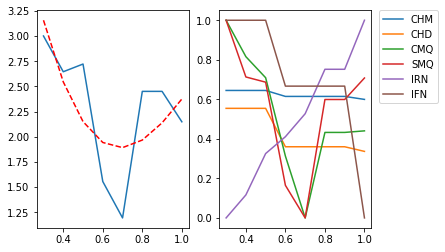




Metrics for isa-group__ideas-studio
KeyError on isa-group__ideas-studio



Metrics for tanzhb__zhgj-project
Total classes: 508
Total controllers: 75
Open issues : 1
Stars : 3
Commits: 1381


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [12]:
import re

def read_projects():
    # project_name, [class_count, controller_count]
    projects = {}
    with open('final_projects', 'r+') as f:
        line = f.readline()
        while line:
            line = f.readline()
            split = line.split(',')
            split[-1] = split[-1].strip()
            projects[split[0].replace('/', '__')] = split[1:3]

    return projects

projects = read_projects()
projects_data = pd.read_csv('repos_data_sorted')

# Plot metrics
# Read all csv
total = 0
csvs = []
dir = '.'
for cur, directories, files in os.walk(dir):
    if cur == dir: # Current directory only
        for f in files:
            if 'csv' in f:
                total += 1
                csvs.append(f)
    
executed_projects = set()
for f in csvs:
    try:
        project_name = re.split(r'_\d', f)[0]
        if project_name in executed_projects:
            continue
        executed_projects.add(project_name)
        project_data = projects_data[projects_data.name.eq(project_name.replace('__','/'))]
        print(f"\n\n\nMetrics for {project_name}")
        project = projects[project_name]
        print(f"Total classes: {project[0]}")
        print(f"Total controllers: {project[1]}")
        print(f"Open issues : {project_data.open_issues.item()}")
        print(f"Stars : {project_data.stars.item()}")
        print(f"Commits: {project_data.commit_count.item()}")
        

        df = read_csv(f)
        df = normalize_data(df)
        df = adjust_values(df)
        df = calculate_total(df)
        df = choose_best_iteration_for_resolution(df)
        print(f"Max val resolution: {df.loc[df['Total'].idxmax()].Resolution}")
        plot(df)
    except KeyError as e:
        print(f"KeyError on {project_name}")


In [ ]:
# Boxplots
frames = []
executed_projects = set()
for f in csvs:
    project_name = re.split(r'_\d', f)[0]
    if project_name in executed_projects:
        continue
    df = read_csv(f)
    df = adjust_values(df)
    df = calculate_total(df)
    df = choose_best_iteration_for_resolution(df)
    df_best = df.sort_values('Total', ascending=False)[0:1]
          
    frames.append(df_best)
    
df_concat = pd.concat(frames)
df_concat.boxplot(column=['CHM', 'CHD', 'SMQ', 'CMQ'])